In [245]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [246]:
mov = pd.read_csv("my_movies.csv")

In [247]:
mov.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [248]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [249]:
mov_1 = mov.iloc[:,0:5]

In [250]:
df1 = pd.get_dummies(mov_1)

df1.head()

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [251]:
mov_2 = mov.iloc[:,5:15]

In [252]:
mov_2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [253]:
mov_2.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [254]:
movies_new=mov_2.melt(var_name='Movies',value_name='Values')
movies_new

,Movies,Values
0,Sixth Sense,1
1,Sixth Sense,0
2,Sixth Sense,0
3,Sixth Sense,1
4,Sixth Sense,1
...,...,...
95,Green Mile,0
96,Green Mile,0
97,Green Mile,0
98,Green Mile,0


In [255]:
movies=pd.crosstab(index=movies_new['Values'],columns=movies_new['Movies'])
movies

Movies,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
Values,,,,,,,,,,
0,9,3,8,8,9,9,8,8,4,4
1,1,7,2,2,1,1,2,2,6,6


<li> Braveheart, Harry Potter 2, LOTR are the Least watched movie.
<li> Gladiator, Sixth Sense, Patriot are the Most watched movie.

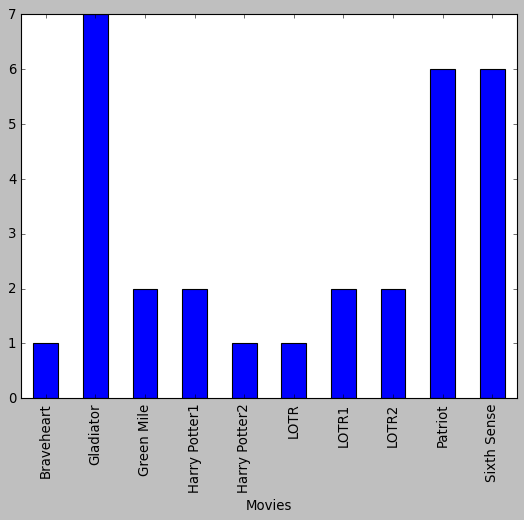

In [256]:
movies.iloc[1,:].plot(kind='bar')

Most watched or rated is Gladiator, Patriot and Sixth Sense.

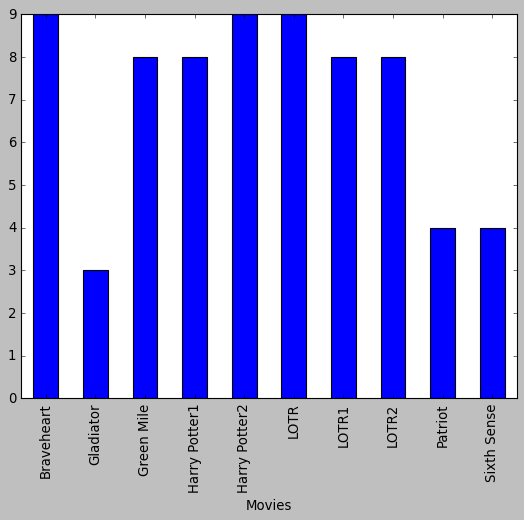

In [257]:
movies.iloc[0,:].plot(kind='bar')

Least watched movies are Brave heart, Harry Potter 2, LOTR.

In [258]:
#counting how many books are purchased

movies.index = ['Not_Watched', 'Watched']
movies

Movies,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
Not_Watched,9,3,8,8,9,9,8,8,4,4
Watched,1,7,2,2,1,1,2,2,6,6


In [259]:
print("Maximum Watched movie:" ,movies.idxmax(axis=1)[1],':',movies.loc['Watched'].max())
print("Least Watched movie:" ,movies.idxmax(axis=1)[0],':',movies.loc['Not_Watched'].max())

Maximum Watched movie: Gladiator : 7
Least Watched movie: Braveheart : 9


In [260]:
sorted_df = pd.DataFrame(movies.sort_values(by = ['Watched'], axis=1, ascending=False).transpose())
sorted_df

,Not_Watched,Watched
Movies,,
Gladiator,3,7
Patriot,4,6
Sixth Sense,4,6
Green Mile,8,2
Harry Potter1,8,2
LOTR1,8,2
LOTR2,8,2
Braveheart,9,1
Harry Potter2,9,1


In [261]:
#percentage of movies Watched

sorted_df['Watched %']= sorted_df.Watched/sum(sorted_df.Watched)
sorted_df

,Not_Watched,Watched,Watched %
Movies,,,
Gladiator,3,7,0.233333
Patriot,4,6,0.200000
Sixth Sense,4,6,0.200000
Green Mile,8,2,0.066667
Harry Potter1,8,2,0.066667
LOTR1,8,2,0.066667
LOTR2,8,2,0.066667
Braveheart,9,1,0.033333
Harry Potter2,9,1,0.033333


In [262]:
np.mean(sorted_df['Watched %'])

0.09999999999999999

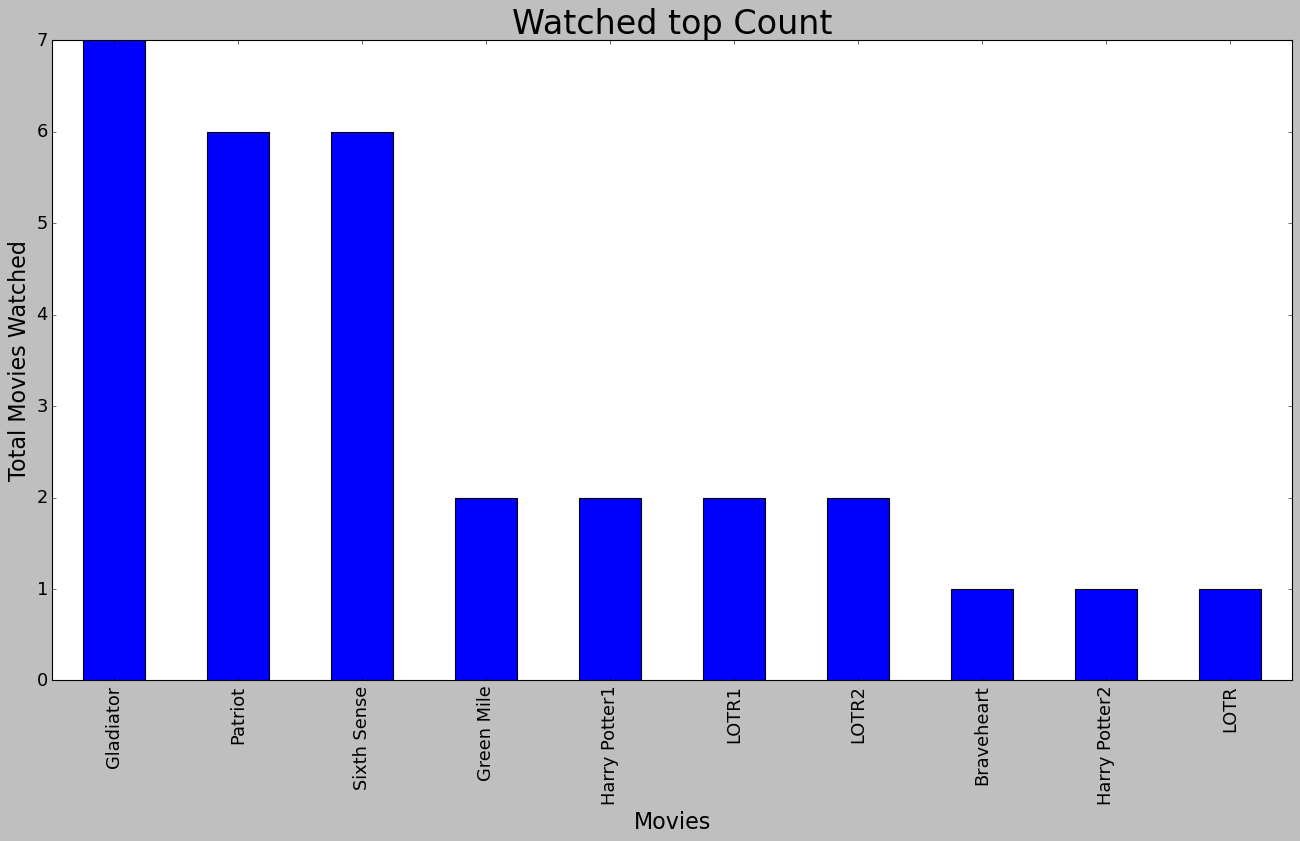

In [263]:
fig = plt.subplots(figsize=(20,10))

Watched = sorted_df.head(50).xs('Watched' , axis=1)

Watched.plot(kind='bar', fontsize=16)

plt.title('Watched top Count',fontsize=30)
plt.xlabel('Movies', fontsize=20)
plt.ylabel('Total Movies Watched', fontsize=20)
plt.show()

<li>Gladiator, Patriot, Sixth Sense all have high Percentage.
<li>Braveheart, Harry Potter2, LOTR are all least watched movies.
<li>Whereas Green Mile, Harry Potter2, LOTR1, LOTR2 are all 2nd highest number of watched movies.

# Apriori Algorithm

In [264]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items1 = apriori(mov_2, min_support=0.10, max_len = 4, use_colnames=True)
freq_items1.sort_values('support', ascending = False, inplace = True)

freq_items1.tail()

,support,itemsets
24,0.1,"(LOTR2, Harry Potter1)"
25,0.1,"(Harry Potter2, Harry Potter1)"
27,0.1,"(Patriot, Braveheart)"
28,0.1,"(Green Mile, LOTR2)"
51,0.1,"(LOTR1, Green Mile, Harry Potter1, LOTR2)"


In [265]:
#generating rules
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False, inplace=True) #sorted with lift > 1

In [266]:
rules1.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
119,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
116,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


# Removing Redundancy

In [267]:
redundancy = rules1.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [268]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
203,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
204,(Gladiator),"(Sixth Sense, LOTR, Green Mile)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
205,(Gladiator),"(Patriot, Braveheart)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
206,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.00
207,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.00


**An leverage value of 0 indicates independence. Range will be [-1 1].**





**A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]**

# Finding Unique Sets

In [269]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(208, 9)

In [270]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
5,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
8,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
9,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


# Generated Rules analysis

In [271]:
#Rules sorted with respect to lift

top_sort = unique_rules[unique_rules['lift']>1.5]

In [272]:
top_sored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
1,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
2,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
3,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


**Gladiator, Green Mile, Sixth Sense, LOTR1, LOTR2 have a lift of >1.5**

In [273]:
x = top_sort[['antecedents','consequents']]

In [274]:
# top sorted Antecedents

item_list = [] 
for i in x.antecedents.to_list(): 
    for j in list(set(i)):
        item_list.append(j)  

In [275]:
# top sorted consequents

item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [276]:
#generating unique list of items (# without redundacy)

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    
    # convert the set to the list 
    unique_list = (list(list_set))
    
    top_items =[]
    for m in unique_list:
        top_items.append(m)  
        
    print(top_items)

### Concluding top_items and the shuffled combination of top lift result

In [277]:
unique(item_list) #number of Unique Movies

['LOTR1', 'Green Mile', 'Braveheart', 'LOTR', 'Harry Potter1', 'Gladiator', 'Harry Potter2', 'Patriot', 'Sixth Sense', 'LOTR2']


<li> Unique list of movies that can be coupled together are listed above.
<li> We can use these items to group together to increase the sales.
<li> We can further analyze with different support, confidence values, and min_threshold to generate different sets.

### Trying different values of Min_support, Metric, Max_len, and Min_thershold.

In [278]:
frequent_movies_s = apriori(mov_2, min_support = 0.005, max_len = 3, use_colnames = True)

In [279]:
#sorting with respect to support
frequent_movies_s.sort_values("support", ascending = False, inplace = True)

In [280]:
#generating association rules
rules = association_rules(frequent_movies_s, metric = "lift", min_threshold= 1)

In [281]:
#sorting rules with respect to lift
rules.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
84,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
80,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
71,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
66,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
64,(LOTR2),"(LOTR1, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
63,(LOTR1),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
59,(Green Mile),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


## Min_support = 0.1, Max_len = 5, Lift, Min_threshold=10

In [282]:
frequent_movies_2 = apriori(mov_2, min_support = 0.1, max_len = 5, use_colnames = True)
rules2 = association_rules(frequent_movies_2, metric = "lift", min_threshold= 10)

## Min_support = 0.2, Max_len = 4, Lift, Min_threshold=75%

In [283]:
frequent_movies_3 = apriori(mov_2, min_support = 0.2, max_len = 4, use_colnames = True)
rules2 = association_rules(frequent_movies_3, metric = "lift", min_threshold=0.75)

## Min_support = 0.1, Max_len = 3, Lift, Min_threshold=1

In [284]:
frequent_movies_4 = apriori(mov_2, min_support = 0.1, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_4, metric = "lift", min_threshold= 1)

## Min_support = 0.2, Max_len = 3, Confidence, Min_threshold = 1.5

In [285]:
frequent_movies_5 = apriori(mov_2, min_support = 0.2, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_5, metric = "confidence", min_threshold= 1.5)

## Min_support = 0.2, Max_len = 3, Confidence, Min_threshold = 1

In [286]:
frequent_movies_6 = apriori(mov_2, min_support = 0.2, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_6, metric = "confidence", min_threshold= 1)

# Bar Plots

Text(0, 0.5, 'Support')

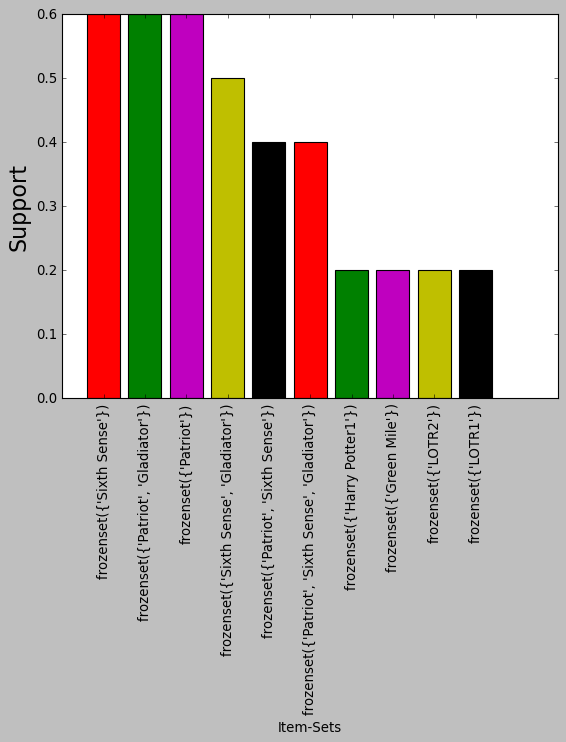

In [287]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_movies_s.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_movies_s.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)


Text(0, 0.5, 'Support')

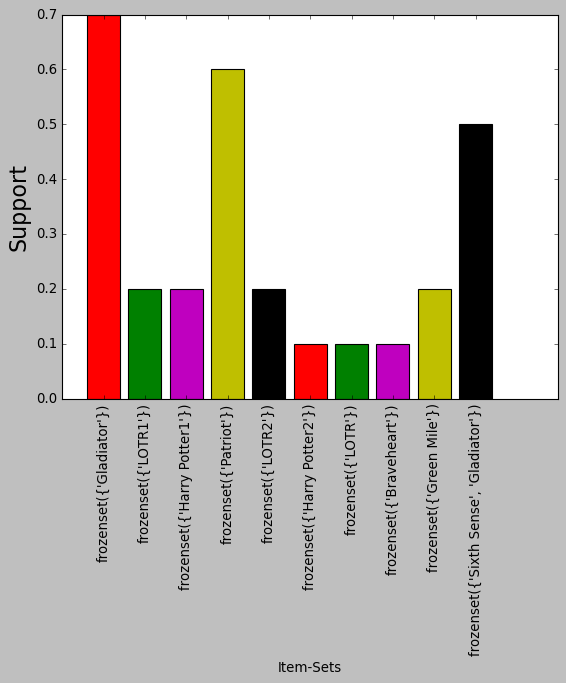

In [288]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_movies_2.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_movies_2.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)


Text(0, 0.5, 'Support')

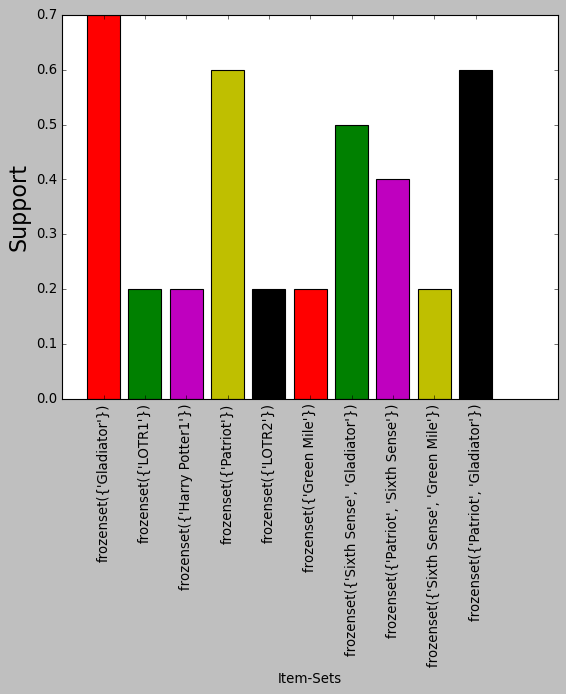

In [289]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_movies_3.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_movies_3.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)


Text(0, 0.5, 'Support')

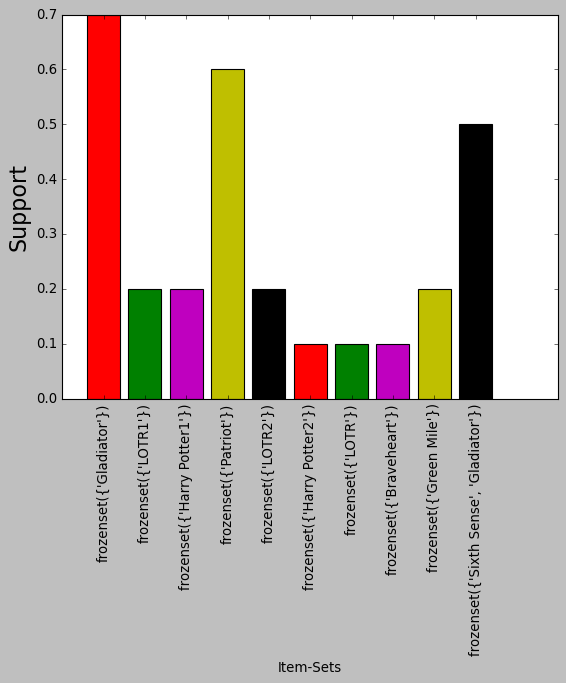

In [290]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_movies_4.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_movies_4.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)


Text(0, 0.5, 'Support')

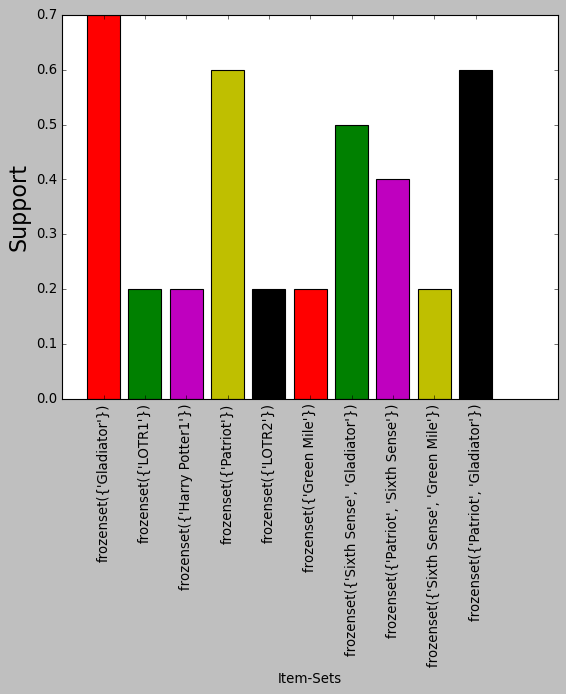

In [291]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_movies_5.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_movies_5.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)


Text(0, 0.5, 'Support')

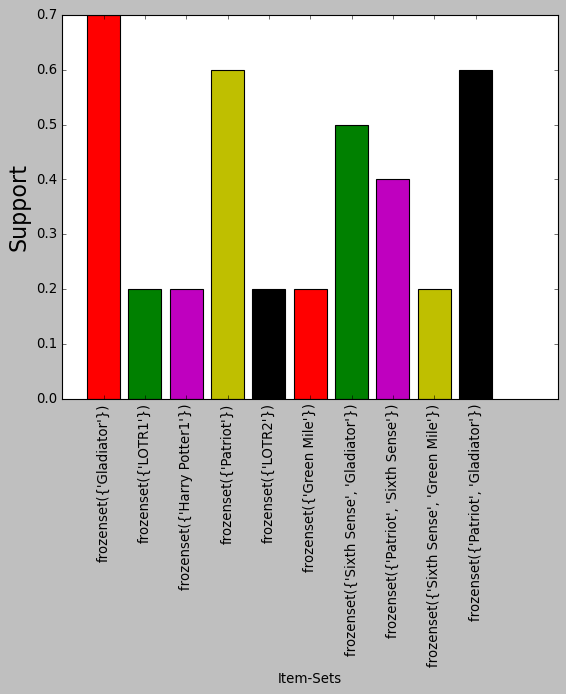

In [292]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_movies_6.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_movies_6.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)

## Above plots shows the different number of sets we can produce with change in Support, confidence, Max_length and Min_thershold.